In [12]:
pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=094d5ea06fb92dae69b275eb29e04958107eafb4322b9c9788cec38557cc4d82
  Stored in directory: /Users/saumyanair/Library/Caches/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
from population import live_data
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np


In [18]:
df = pd.read_html(live_data('https://www.worldometers.info/world-population/world-population-by-year/').text)
df = df[0]

In [19]:
df.sort_values(by="Year",ascending=True,inplace=True)

In [20]:
df = df.reset_index(drop=True)

In [21]:
df.tail()

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
89,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %
90,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %
91,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %
92,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %
93,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %


In [22]:
df = df.loc[:,["Year","World Population"]]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
Year                94 non-null int64
World Population    94 non-null int64
dtypes: int64(2)
memory usage: 1.5 KB


In [24]:
df["World Population"]=round(df["World Population"]/1000000,2)

FileNotFoundError: [Errno 2] No such file or directory: '/lib/python3.7/site-packages/ffmpeg': '/lib/python3.7/site-packages/ffmpeg'

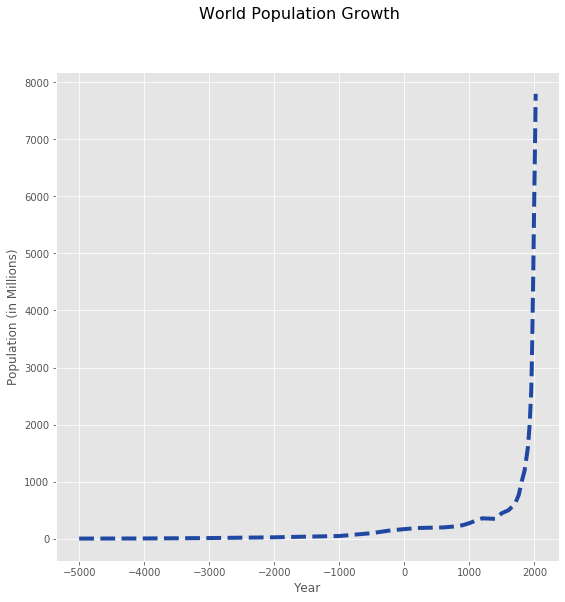

In [26]:
#%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.style as mplstyle

plt.rcParams['savefig.bbox'] = 'tight'

#plt.rcParams['animation.ffmpeg_path'] = '/lib/python3.7/site-packages/ffmpeg'

plt.figure(figsize=(9,9))
plt.suptitle('World Population Growth', fontsize=16)

x,y = [], []

ax, = plt.plot(df["Year"],df["World Population"],
               label="Population (in Millions)",
              color="#2048a3",linewidth=4,linestyle='--')

plt.xlabel("Year")
plt.ylabel("Population (in Millions)")
mplstyle.use(['ggplot'])

ann_list_1 =[]
ann_list_2 =[]

def animate(i):     # Function is called for every Frame of the Animation
    
    for j, a in enumerate(ann_list_1):
        a.remove()
        ann_list_1[:] = []
        
    for k, b in enumerate(ann_list_2):
        b.remove()
        ann_list_2[:] = []
    
    x = df["Year"][:i]    
    y = df["World Population"][:i]
    
    ax.set_data(x,y)
    
    year = df["Year"][i]
    pop = df["World Population"][i]
    
    year = f'{year*-1} BC' if year < 0 else f'{year} AD'
    pop = f'{pop} Million' if pop < 1000 else f'{round(pop/1000,2)} Billion'
    
    ann_year = plt.annotate(year,xy = (-4000,6000),color="g",fontsize=25)
    ann_pop = plt.annotate(pop,xy = (-4000,5000),color="r",fontsize=25)
    ann_list_1.append(ann_year)
    ann_list_2.append(ann_pop)
    

anim = FuncAnimation(plt.gcf(), animate,frames=df["Year"].count(),interval=10000)
anim

# f = r"population_animation.gif" 
# writergif = animation.PillowWriter(fps=8) 
# anim.save(f, writer=writergif)

f = r"population.animation.mp4" 
writervideo = animation.FFMpegWriter(fps=10) 
anim.save(f, writer=writervideo)